In [97]:
using Plots
using NBInclude
using SparseArrays
using DataFrames
using LaTeXStrings
using ProgressBars

In [98]:
@nbinclude("Kagome First Band Approximation.ipynb"; regex=r"#.executeme");
@nbinclude(joinpath("../Braiding Utils.ipynb"));

In [111]:
Nx = 6
Ny = 6
N=Nx*Ny*3
cut_off = Nx*Ny
PN = [0,1,2,3]
U = 2
t1 = -1; L1 = 0.9; t2 = 0; L2 = 0;
#t1 = -1; L1 = 0.28; t2 = 0.3; L2 = 0.2;

In [112]:
sp_basis = NLevelBasis(N)
sp_matrix = dense(get_SP_H(Nx, Ny, t1, L1, t2, L2)).data
H1 = get_sp_op(sp_basis, sp_matrix);

In [113]:
E_sp = eigenenergies(dense(H1));

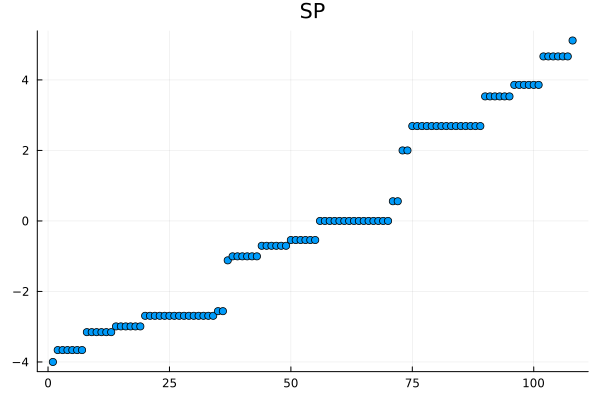

In [114]:
scatter(E_sp, legend=false, title="SP")

In [115]:
sub_states = get_sub_states(H1, cut_off);
basis_sub, P, Pt = get_projector_op(sub_states, sp_basis);
H1_sub = get_subspace_op(H1, P, Pt);
num_sub_list = get_num_sub_list(N, sp_basis, P, Pt);

In [116]:
states_mb = bosonstates(basis_sub, PN) 
basis_mb = ManyBodyBasis(basis_sub, states_mb)
H1_MB = get_mb_op(basis_mb, H1_sub);

In [117]:
basis_mb.shape

1-element Vector{Int64}:
 9139

In [ ]:
E_mb = eigenenergies(dense((H1_MB'+H1_MB)/2));

In [ ]:
@nbinclude("Kagome MB .ipynb"; regex=r"#.*executeme");
basis_cut_mb, basis_cut_sp = get_Bosonic_MB_Basis(cut_off, PN);

In [ ]:
H1cut = SparseOperator(basis_cut_mb)
H1cut.data = H1_MB.data;

In [56]:
H_Int = Hubbard_Interaction_op(P, Pt, basis_cut_mb, cut_off, U);

0.0%┣                                                ┫ 0/8 [00:00<00:00, -0s/it]
25.0%┣███████████▊                                   ┫ 2/8 [00:00<00:01, 11it/s]
37.5%┣█████████████████▋                             ┫ 3/8 [00:00<00:00, 13it/s]
50.0%┣███████████████████████▌                       ┫ 4/8 [00:00<00:00, 14it/s]
75.0%┣███████████████████████████████████▎           ┫ 6/8 [00:00<00:00, 15it/s]
87.5%┣█████████████████████████████████████████▏     ┫ 7/8 [00:00<00:00, 16it/s]
100.0%┣██████████████████████████████████████████████┫ 8/8 [00:00<00:00, 15it/s]
100.0%┣██████████████████████████████████████████████┫ 8/8 [00:00<00:00, 15it/s]


In [57]:
Total_H = H1cut + H_Int;

In [58]:
number_mb_list_operators = get_num_mb_op(N, basis_cut_sp, num_sub_list, basis_cut_mb, basis_sub);

0.0%┣                                               ┫ 0/24 [00:00<00:00, -0s/it]
100.0%┣██████████████████████████████████████████┫ 24/24 [00:00<00:00, 1.7kit/s]
100.0%┣██████████████████████████████████████████┫ 24/24 [00:00<00:00, 1.6kit/s]


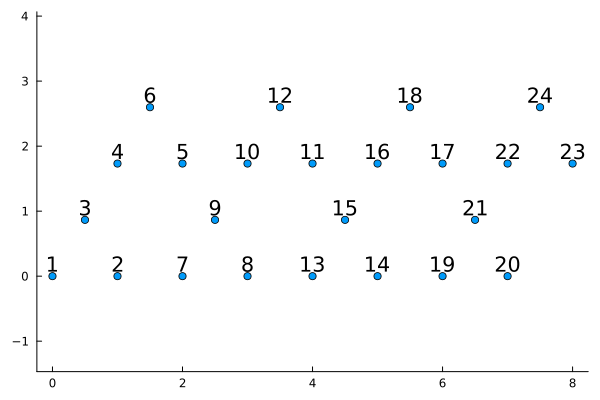

In [59]:
plot_kagome(Nx,Ny)

In [101]:
V0 = [4,0]; Imp_Site = [15,1]
Impurity_Data = Impurity(V0, Imp_Site);

In [102]:
Impurity_H = Imp_H(Total_H, number_mb_list_operators, Impurity_Data)
H_total_imp = dense((Impurity_H+Impurity_H')/2);

In [103]:
pn = maximum(PN)
E, V = eigenstates(dense(H_total_imp))
filtered_energies = get_filtered_energies(pn, E, V, basis_cut_mb);

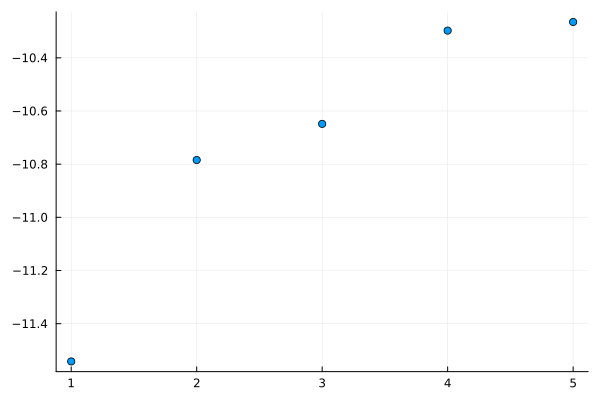

In [104]:
scatter(filtered_energies[1:5], legend=false)

In [105]:
N_Pin = 2
NPhi0 = Int(Nx*Ny)
nu0 = 1/2 # The quasihole numbers depend on Laughlin fraction
NPhi = NPhi0-N_Pin
N_d = Int(NPhi - pn/nu0)
Degeneracy = Int((factorial(N_d + pn - 1) / (factorial(N_d) * factorial(pn - 1))) * (NPhi / pn))
println("Lattice: ",Nx,"x",Ny,
        "\nFilling Fraction = ",pn//NPhi0," (The Number of Quasiholes = ",(N_Pin+N_d),
        ")\nThe Number of Flux Quanta = ", NPhi,
        " (Delocalised Number = ", N_d,
        ")\nThe Total Number of Particle = ",pn,
        "\nThe Number of State of Ground Degeneracy = ",Degeneracy)

Lattice: 4x2
Filling Fraction = 3//8 (The Number of Quasiholes = 2)
The Number of Flux Quanta = 6 (Delocalised Number = 0)
The Total Number of Particle = 3
The Number of State of Ground Degeneracy = 2


In [106]:
r_hubbard_states = Restricted_Hubbard_States(V);

In [107]:
avg_density = Get_Avg_Density_List(Nx, Ny, Degeneracy, N, number_mb_list_operators, basis_cut_mb, r_hubbard_states);

In [108]:
x_co = OffsetArray(get_sites(Nx, Ny, a1_vec, a2_vec, Basis)[4], 1:N)
y_co = OffsetArray(get_sites(Nx, Ny, a1_vec, a2_vec, Basis)[5], 1:N);

In [109]:
z = exp_list1.(x_co, y_co)
z = collect(Iterators.flatten(z))

24-element Vector{Float64}:
 0.15071911010702665
 0.1414375304545149
 0.14927001160621559
 0.1507191101070267
 0.13939630251586094
 0.14825224004602922
 0.15558399219824348
 0.1128999416056511
 0.17702659330800927
 0.1568010681373573
 0.06938516285459456
 0.1447712007114944
 0.0535694484303717
 0.0693851628545944
 0.02348680511605407
 0.05356944843037173
 0.11289994160565169
 0.07581024258545355
 0.15680106813735722
 0.13939630251586105
 0.1770265933080093
 0.15558399219824334
 0.14143753045451424
 0.14477120071149363

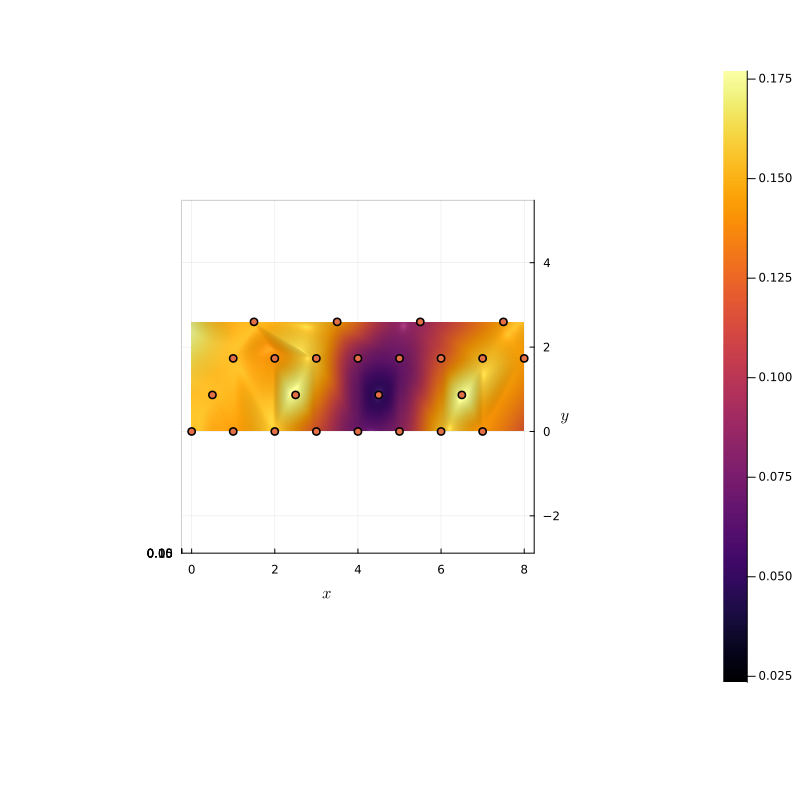

In [110]:
density = exp_list1.(x_co, y_co)
density = collect(Iterators.flatten(z))
surface(x_co,y_co,z,xlabel=L"$x$",ylabel=L"$y$", camera = (0,90), size=(800,800), aspect_ratio=:equal)

# Plot kagome as project to the plot of density profile
scatter!(x_co, y_co, 0. *density, camera=(0,90), legend=false)